# EXO2 MNIST-FASHION

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
# importing the training and testing data
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
# creating training and testing datasets with labels
X_train = train_data.drop('label', axis = 1)
y_train = train_data['label']

X_test = test_data.drop('label', axis = 1)
y_test = test_data['label']

In [5]:
# normalizing the data
X_train = X_train / 255
X_test = X_test / 255

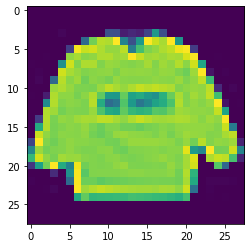

In [6]:
plt.imshow(X_train.iloc[:1].values.reshape((28, 28)))

In [7]:
rows, columns = 28, 28
X_train = X_train.values.reshape(X_train.shape[0], rows, columns, 1)
X_test = X_test.values.reshape(X_test.shape[0], rows, columns, 1)

In [8]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (rows, columns, 1)))

CNN_model.add(MaxPool2D(pool_size = (2, 2)))


CNN_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

CNN_model.add(MaxPool2D(pool_size = (2, 2)))

# convolutional layer - 3
CNN_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Max pooling Layer - 3
CNN_model.add(MaxPool2D(pool_size = (2, 2)))

# flatten layer
CNN_model.add(Flatten())
# fully connected layer 1
CNN_model.add(Dense(units = 128, activation = 'relu'))

# output layer
CNN_model.add(Dense(units = len(set(y_train)), activation = 'softmax'))
# compiling the model
CNN_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
epochs = 50
fitted_model = CNN_model.fit(X_train, y_train, epochs = epochs, verbose = 1, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5982 - accuracy: 0.7818 - val_loss: 0.4643 - val_accuracy: 0.8266
Epoch 2/50
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4028 - accuracy: 0.8515 - val_loss: 0.3777 - val_accuracy: 0.8623
Epoch 3/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3440 - accuracy: 0.8730 - val_loss: 0.3399 - val_accuracy: 0.8784
Epoch 4/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3060 - accuracy: 0.8858 - val_loss: 0.3265 - val_accuracy: 0.8777
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2752 - accuracy: 0.8971 - val_loss: 0.3316 - val_accuracy: 0.8786
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2498 - accuracy: 0.9055 - val_loss: 0.3186 - val_accuracy: 0.8910
Epoch 7/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2270 - accuracy: 0.9156 - val_loss: 0.2908 -

In [10]:
# summary of the model
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [12]:
CNN_model2 = Sequential()
CNN_model2.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (rows, columns, 1)))

CNN_model2.add(MaxPool2D(pool_size = (2, 2)))

CNN_model2.add(Dropout(0.2))

CNN_model2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

CNN_model2.add(MaxPool2D(pool_size = (2, 2)))

CNN_model2.add(Dropout(0.2))

CNN_model2.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))

CNN_model2.add(MaxPool2D(pool_size = (2, 2)))

CNN_model2.add(Dropout(0.2))

CNN_model2.add(Flatten())

CNN_model2.add(Dense(units = 128, activation = 'relu'))

CNN_model2.add(Dropout(0.2))

CNN_model2.add(Dense(units = len(set(y_train)), activation = 'softmax'))

CNN_model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
epochs = 50
fitted_model = CNN_model.fit(X_train, y_train, epochs = epochs, verbose = 1, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 1.0313 - val_accuracy: 0.8757
Epoch 2/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.9620 - val_accuracy: 0.8857
Epoch 3/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.8982 - val_accuracy: 0.8903
Epoch 4/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0320 - accuracy: 0.9890 - val_loss: 0.8590 - val_accuracy: 0.8882
Epoch 5/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.9292 - val_accuracy: 0.8876
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.9796 - val_accuracy: 0.8842
Epoch 7/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0290 - accuracy: 0.9899 - val_loss: 0.9651 -

# EXO3 RICE IMAGE